<!DOCTYPE html>
<html>
<head>
    <title>Predykcja jakości wina przy pomocy metod Machine Learning</title>
</head>
<body>
    <h1>Predykcja jakości wina przy pomocy metod Machine Learning</h1>
    <p>Projekt zaliczeniowy z przedmiotu 'Wprowadzenie do programowania w języku Python' </p>
    <p>Bal Szymon 165880</p>
    <p>Jakub Golen 169781</p>
</body>
</html>

## 1. Opis projektu <br>
Celem projektu jest przygotowanie jak najdokładniejszej predykcji jakości wina. W tym celu skorzystamy z ogólnodostępnych modeli uczenia maszynowego wykonujących klasyfikację jednego z parametrów.
Kroki potrzebne do uzyskania modelu
- znalezienie bazy danych zawierającej dane dotyczące parametrów win oraz ocenę jakości
- analizę danych w celu jak najdokładniejszego zrozumienia zbioru
- przygotowanie danych pozwalające na uzyskanie wyższej dokładności modelu
- test modeli w celu wybrania najdokładniejszych z nich
- tuning hiperparametrów wśród modeli, które z ustawieniami domyślnymi najlepiej pasowały do bazy danych

W celu wykonania predykcji postanowiliśmy wykorzystać zestaw danych z 2009, charakteryzujący portugalskie wina białe i czerwone. Dane pobraliśmy z repozytorium baz danych przeznaczonych do uczenia maszynowego udostępnianego przez University of California.
Link do bazy danych https://archive.ics.uci.edu/dataset/186/wine+quality

Baza danych składa się z 2 plików csv, jeden dla win czerwonych(1599 wierszy), drugi białych(4898 wierszy) opisujących skład chemiczny każdego z ocenionych win
Każdy wiersz zawiera informacje na temat 11 parametrów oraz 1 dodatkowy przypisany ręcznie który odpowiada za typ wina

Opis parametrów wina:

***fixed acidity***  - Kwasowość stała: większość kwasów obecnych w winie jest trwała lub nietrwała (nie odparowuje łatwo)

***volatile acidity*** - lotna kwasowość: ilość kwasu octowego w winie, która przy zbyt wysokich poziomach może prowadzić do nieprzyjemnego smaku octu

***citric acid*** - kwas cytrynowy: znajdujący się w niewielkich ilościach, może dodać "świeżości" i smaku winom

***residual sugar*** - cukier resztkowy: ilość cukru pozostającego po zakończeniu fermentacji, rzadko spotyka się wina zawierające mniej niż 1 gram/litr, a wina z zawartością ponad 45 gramów/litr są uważane za słodkie

***chlorides*** - chlorki: ilość soli w winie

***free sulfur dioxide*** - dwutlenek siarki wolny: forma wolna SO2 istnieje w równowadze między cząsteczkowym SO2 (jako gaz rozpuszczony) a jonem bisulfurowym; zapobiega rozwojowi drobnoustrojów i utlenianiu się wina

***total sulfur dioxide*** - dwutlenek siarki całkowity: ilość wolnych i związanych form SO2; w niskich stężeniach SO2 jest głównie nieodczuwalny w winie, ale przy stężeniach wolnego SO2 powyżej 50 ppm SO2 staje się wyczuwalny w zapachu i smaku wina

***density*** - gęstość: gęstość wina jest zbliżona do gęstości wody w zależności od procentowej zawartości alkoholu i cukru.

***pH***: opisuje, jak kwaśne lub zasadowe jest wino w skali od 0 (bardzo kwaśne) do 14 (bardzo zasadowe); większość win mieści się w zakresie od 3 do 4 w skali pH

***sulphates*** - siarczany: dodatek do wina, który może przyczyniać się do poziomu gazowego dwutlenku siarki (SO2), który działa jako środek przeciwdrobnoustrojowy i przeciwutleniający.

***alcohol***: procentowa zawartość alkoholu w winie

## 2 Drzewo decyzyjne
Struktura wykorzystywana w klasyfikacji lub regresji. <br> Używane są w celu pomocy w obliczeniach gdzie ciężki do ustalenia jest logiczny algorytm do obliczania lub klasyfikowania danych. <br> Składa się ono z  warunków które mają za cel jak najdokładniejsze ustalenie zależności pomiędzy podanymi danymi, a otrzymanym wynikiem <br>
Składa się ono z się z **korzenia** (*root*), **węzłów** (*nodes*) i **liści** (*leaves*) <br>

<br> <br>
Działanie drzew przypomina zbiór bramek logicznych gdzie przy klasyfikacji możliwa jest ona przy spełnianiu tylko jednego z warunków <br> 
Oczywiście przykład jest bardzo prosty i zawiera tylko dwa parametry x, ale pokazuje sposób działania drzewa poprzez tworzenie listy warunków które w zależności od spełniania poszczególnych z nich 

***Kryterium wyboru testu*** <br>
Czynnikiem który odgrywa kluczowe znaczenie przy tworzeniu drzewa decyzyjnego jest tzw. Kryterium wyboru testu które odpowiada za sposób w jaki drzewo decyzyjne podejmuje decyzje o tworzeniu kolejnych rozgałęzień. <br> Najpopularniejsze przy rozwiazywaniu problemów klasyfikacji to kryterium entropii <br>

***Entropia*** 
<center>

_g<sub>t</sub>(P) = I(P) - E<sub>t</sub>(P)_

</center>

***E<sub>t</sub>(P)*** oznacza stopień nieuporządkowania lub niepewności w zbiorze.<br>
W drzewie decyzyjnym służy jako kryterium na podstawie którego tworzony jest podział dążąc do minimalnej niepewności. Nieuporządkowanie danych możemy interpretować jako stopień losowości danych co powoduje wyraźne trudności z wyciągnięciem istotnych informacji <br> <br>
***I(P)*** oznacza to różnorodność, zmienność lub zróżnicowanie wartości w danym zbiorze danych. Im większa jest ta informacja, tym bardziej różnorodne lub bardziej zróżnicowane są dane, co może potencjalnie dostarczyć więcej wiedzy lub informacji przy analizie tych danych.  <br>
Entropia stanowi miarę informacji związanej z danym zjawiskiem, które losowo przyjmuje n stanów. Również oznacza średnią ilość informacji niezbędną do zapamiętania faktu, że dane zjawisko przyjmuje jeden z dostępnych *n* stanów.

## 3. Analiza Zbioru danych

### Import niezbiędnych bibliotek
- **pandas** - import pliku csv i operacje na ramce danych
- **matplotlib** - wizualizacja danych
- **seaborn** - wizualizacja danych
- **tensorflow** - tworzenie sieci neuronowej
- **joblib** - zapis wytrenowanego modelu matematycznego
- **sklearn** - wykorzystanie istniejących algorytmów uczenia maszynowego wykorzystywanego przy klasyfikacji
  - podział danych, 
  - normalizacja, 
  - sprawdzanie dokładności modelu, 
  - szukanie najdokładniejszego modelu



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from joblib import dump


Wczytanie dwóch ramek danych charakteryzujących wino białe i czerwone

In [ ]:
red_wine_dataset = pd.read_csv('winequality-red.csv', sep=';')
white_wine_dataset = pd.read_csv('winequality-white.csv', sep=';')

Dodanie nowej kolumny _is_red_ w celu scharakteryzowania w połączonej ramce danych czy wino jest czerwone czy białe <br>
W celu uniknięcia późniejszych problemów związanych z przetwarzaniem tekstowych typów danych przez modele ML przypisujemy winu czerwonemu **wartość 1**, a **białemu 0** <br>
Następnie łączymy obie ramki danych tworząc ramkę danych na których zostanie wytrenowany model

In [ ]:
red_wine_dataset['is_red'] = 1
white_wine_dataset['is_red'] = 0
wine_dataset = pd.concat([red_wine_dataset,white_wine_dataset], ignore_index=True)
print(wine_dataset.shape) # sprawdzenie czy połączenie dwóch ramek odbyło się poprawnie
wine_dataset.to_csv('wine_dataset.csv')

(6497, 13)


### Analiza zbioru danych
Badanie parametrów połączonej ramki danych za pomocą funkcji **describe**

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Dodanie 0.001 dla parametru ***critic acid*** w celu usunięcia bardzo skrajnej wartości.

In [ ]:
wine_dataset['citric acid'] = wine_dataset['citric acid'] + 0.001

Wyświetlenie jako próbki kilku losowych wierszy. Aktualnie wszystkie dane są zapisane w postaci liczbowej czyli są zgodne z testowanymi modelami. 

In [ ]:
print(wine_dataset.sample(5))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3095           6.70             0.620        0.241             1.1      0.039   
1956           6.10             0.360        0.331             1.1      0.050   
5032           6.20             0.255        0.271             1.3      0.037   
3288           7.10             0.160        0.251             1.3      0.034   
4256           6.45             0.140        0.421             1.2      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3095                  6.0                  62.0  0.99340  3.41       0.32   
1956                 24.0                 169.0  0.99270  3.15       0.78   
5032                 30.0                  86.0  0.98834  3.05       0.59   
3288                 28.0                 123.0  0.99150  3.27       0.55   
4256                 51.0                 129.0  0.99116  3.27       0.69   

      alcohol  quality  is_red  
3095     10.4    

Prezentacja rozkładu ocen dla win czerwonych i białych 

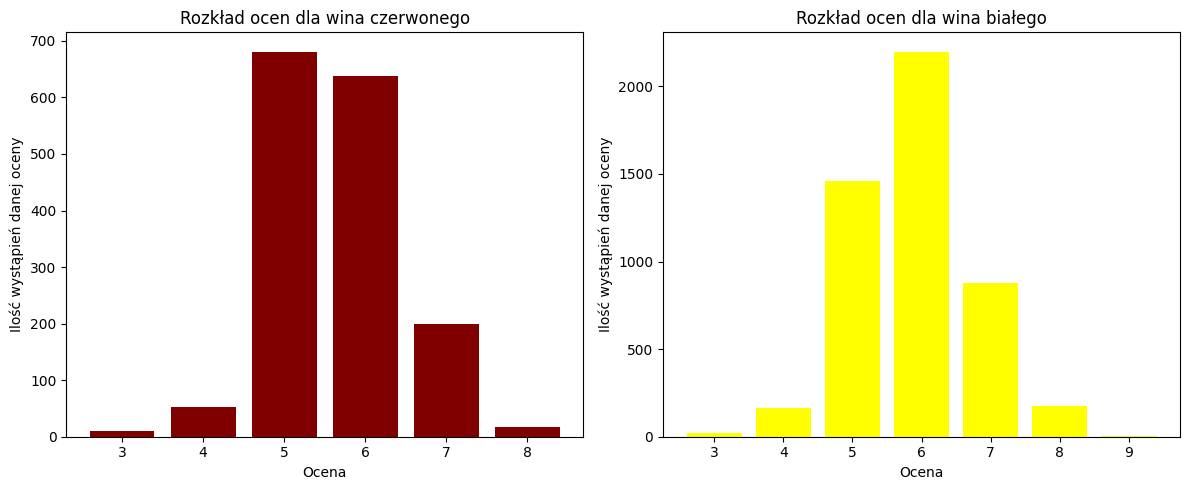

In [ ]:
#d ane dla wina czerwonego
counts_red = red_wine_dataset['quality'].value_counts()
counts_red  = pd.Series(counts_red )

quality_red = counts_red.index.tolist() 

# dane dla wina białego
counts_white = white_wine_dataset['quality'].value_counts()
counts_white= pd.Series(counts_white)

quality_white = counts_white.index.tolist() 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# wykres jakości win czerwonych
axs[0].bar(quality_red, counts_red, color='maroon')
axs[0].set_xlabel("Ocena")
axs[0].set_ylabel("Ilość wystąpień danej oceny")
axs[0].set_title("Rozkład ocen dla wina czerwonego")

# wykres jakości win białych
axs[1].bar(quality_white, counts_white, color='yellow')
axs[1].set_xlabel("Ocena")
axs[1].set_ylabel("Ilość wystąpień danej oceny")
axs[1].set_title("Rozkład ocen dla wina białego")

plt.tight_layout()

plt.show()

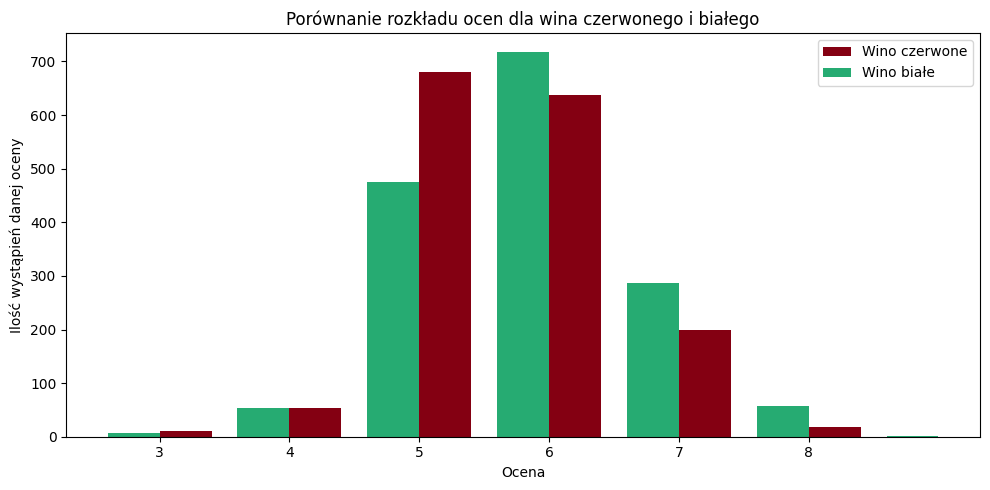

In [ ]:
len_red = len(red_wine_dataset['quality'])
len_white = len(white_wine_dataset['quality'])
delta = len_red/len_white 

plt.figure(figsize=(10, 5))

# wartości dla wina czerwonego
plt.bar([q + 0.2 for q in quality_red], counts_red, width=0.4, color='#840012', label='Wino czerwone')

# wartości dla wina białego
plt.bar([q - 0.2 for q in quality_white], counts_white*delta, width=0.4, color='#26AB72', label='Wino białe')

plt.xlabel("Ocena")
plt.ylabel("Ilość wystąpień danej oceny")
plt.title("Porównanie rozkładu ocen dla wina czerwonego i białego")
plt.xticks(quality_red)
plt.legend()
plt.tight_layout()

plt.show()

Jak widać dodanie parametru 'is_red' było trafną decyzją z powodu na wysoką różnicę w zależności od koloru wina w ilości win win klasyfikowanych jako dobrze <br>
Zdecydowana większość najlepiej ocenianych win z oceną 8 i 9 to wina białe

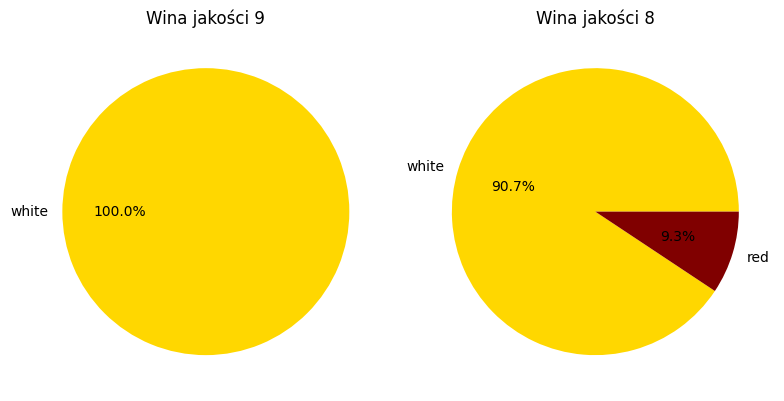

In [ ]:
best_wine_9 = wine_dataset[wine_dataset['quality'] == 9][['quality', 'is_red']]
best_wine_8 = wine_dataset[wine_dataset['quality'] == 8][['quality', 'is_red']]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# wykres dla jakości 9
cts_9 = best_wine_9['is_red'].map({1: 'red', 0: 'white'}).value_counts()
axes[0].pie(cts_9, labels=cts_9.index, autopct='%1.1f%%', colors=['gold', 'maroon'])
axes[0].set_title('Wina jakości 9')

# wykres dla jakości 8
cts_8 = best_wine_8['is_red'].map({1: 'red', 0: 'white'}).value_counts()
axes[1].pie(cts_8, labels=cts_8.index, autopct='%1.1f%%', colors=['gold', 'maroon'])
axes[1].set_title('Wina jakości 8')

plt.tight_layout()
plt.show()

Analizujemy, jak są powiązane ze sobą różne elementy w zestawie danych. Naszym celem jest usunięcie tych elementów, które mają słabe powiązania z parametrem ***quality*** i mają znikomy wpływ na jego wynik.

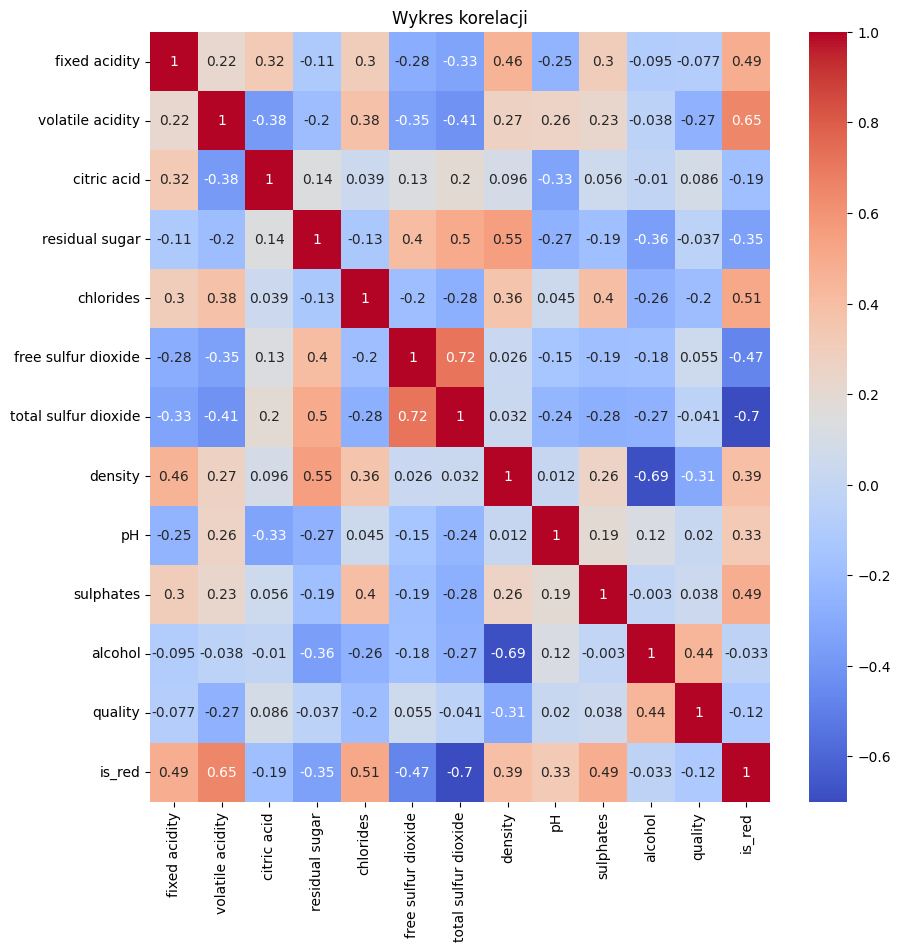

In [ ]:
correlation_matrix = wine_dataset.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Wykres korelacji')
plt.show()

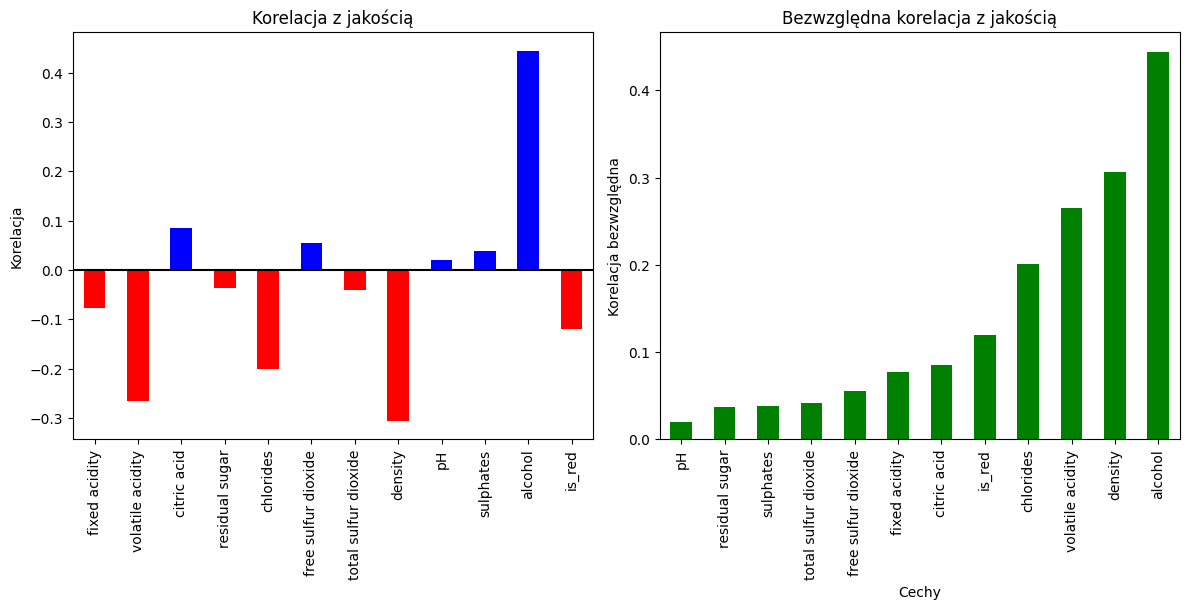

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


correlation_quality = wine_dataset.corr()['quality'].drop('quality')


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# wykres korelacji parametrów
colors = ['red' if x < 0 else 'blue' for x in correlation_quality]
plt.subplot(1, 2, 1)
plt.axhline(y=0, color='black', linestyle='-')
correlation_quality.plot(kind='bar', color=colors)
plt.title('Korelacja z jakością')
plt.ylabel('Korelacja')

# wykres korelacji bezwzględnej korelacji
correlation_quality_abs = correlation_quality.abs().sort_values(ascending=True)
plt.subplot(1, 2, 2)
correlation_quality_abs.plot(kind='bar', color='green')
plt.title('Bezwzględna korelacja z jakością')
plt.ylabel('Korelacja bezwzględna')
plt.tight_layout()
plt.xlabel('Cechy')
plt.show()

In [ ]:
correlation_quality = correlation_quality.abs()
correlation_quality.sort_values()

pH                      0.019506
residual sugar          0.036980
sulphates               0.038485
total sulfur dioxide    0.041385
free sulfur dioxide     0.055463
fixed acidity           0.076743
citric acid             0.085532
is_red                  0.119323
chlorides               0.200666
volatile acidity        0.265699
density                 0.305858
alcohol                 0.444319
Name: quality, dtype: float64

Znalezienie najsłabiej skorelowanych parametrów, mogących mieć negatywny wpływ na część model <br>
Z racji na nalepszą wydajność modeli **XGB**, **RandomForest** oraz **ExtraTrees** w modelu końcowym znajdują się wszystkie początkowe kolumny. Usunięcie jakiegokolwiek z elementów ma negatywny wpływ na końcową dokładność

In [ ]:
low_correlation = correlation_quality[correlation_quality <= 0.05]
print(low_correlation)

residual sugar          0.036980
total sulfur dioxide    0.041385
pH                      0.019506
sulphates               0.038485
Name: quality, dtype: float64


Sprawdzenie czy któraś z kolumn zawiera braki danych <br>

In [ ]:
nan_count = wine_dataset.isna().sum() 
nan_count

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
is_red                  0
dtype: int64

Sprawdzenie ilości duplikatów, nie usuwamy ich ponieważ z racji na wielkość zbioru danych i ich charakterystykę usunięcie duplikatów ma negatywny wpływ na końcową poprawność modeli

In [ ]:
duplicates = wine_dataset[wine_dataset.duplicated()==True].shape[0]
duplicates

1177

### Utworzenie nowej zmiennej _value_  
Tworzenie nowej zmiennej poprzez przypisanie etykiet jakości wina na podstawie ocen ***quality***. <br>
Klasyfikacja odbywa się następująco:
- oceny mniejsze od 4 to wina złej jakości
- wina z ocenami 6 i 5 to wina przeciętnej jakości
- wina z ocenami wyżsszymi od 7 to wina są dobrej jakości

In [ ]:
wine_dataset.loc[wine_dataset['quality'] > 6, 'value'] = 2
wine_dataset.loc[(wine_dataset['quality'] > 4) & (wine_dataset['quality'] < 7), 'value'] = 1
wine_dataset.loc[wine_dataset['quality'] < 5, 'value'] = 0

X = wine_dataset.drop(['quality', 'value'], axis = 1)
y = wine_dataset['value']

In [ ]:
y.to_csv('Wine_Qualities_Categories.csv')

# 3. Trenowanie i testowanie modeli

Podział zbioru danych na dane treningowe i walidacyjne <br>
Dane treningowe w postaci **x_train** i **y_train** służą do nauczenia modeli zależności pomiędzy danymi, a następnie na danych walidacyjnych zostaje przetestowana faktyczna jakość klasyfikacji wykonujących, przez model <br>

In [ ]:
X_train,  X_valid, y_train,  y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
y_train

4402    2.0
3790    1.0
3997    1.0
4291    1.0
2521    1.0
       ... 
3772    1.0
5191    2.0
5226    1.0
5390    1.0
860     1.0
Name: value, Length: 5522, dtype: float64

Próba użycia metody oversamlingu ***smote*** w celu wyrównania wielkości poszczególnych zbiorów <br>
Celem oversamlingu jest wygenerowanie dodatkowych próbek, tak aby ilość elementów **0**,**1** i **2** w zbiorze **y_train** była identyczna <br> <br>
W tym wypadku użycie metody ma bardzo negatywny wpływ na dokładność ponieważ jej dokładność spada o kilka procent

In [ ]:
#number = wine_dataset['value'].value_counts()
#number

#oversample = SMOTE(k_neighbors=3)
#X_train, y_train = oversample.fit_resample(X_train, y_train )
#print(X_train.shape)
#y_train.value_counts()

Import modeli klasyfikacji do przetestowania
Większość pochodzi z biblioteki scikit-learn. Dodatkowo z biblioteki XGBoost zaimportowaliśmy funkcję:
- **XGBClassifier**

In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import BaggingClassifier  
from sklearn.ensemble import ExtraTreesClassifier  
from sklearn.linear_model import SGDClassifier  
from sklearn.neural_network import MLPClassifier  
from xgboost import XGBClassifier  

Przygotowanie listy testowanych modeli klasyfikacji <br>
Każdy test przeprowadzany jest przy takiej samej wartości parametru **random_state** <br>
**Random_state** to hiperparametr w algorytmach uczenia maszynowego kontrolujący ziarno losowości używane podczas generowania losowych liczb lub inicjalizacji. <br> 
Ustawienie tego parametru umożliwia powtarzalność wyników, umożliwiając porównywanie  modeli przy zachowaniu stałego poziomu losowości.

In [ ]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=100000)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Bagging", BaggingClassifier(random_state=42)),
    ("Extra Trees", ExtraTreesClassifier(random_state=42)),
    ("Stochastic Gradient Descent", SGDClassifier(random_state=42)),
    ("Multi-layer Perceptron", MLPClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42)),
]

Testowanie poszczególnych modeli korzystając z danych walidacyjnych. <br>
Zdecydowaliśmy, że najlepszym sposobem sprawdzenia jak wysoka jest zgodność modelu to **accuracy_score**<br>
Accuracy_score poleca na porównaniu dwóch zestawów danych czego wynikiem jest procent zgodności pomiędzy dwoma zbiorami. <br> 
Porównujemy zbiór danych wygenerowany funkcją predicted porównywany jest do zbioru walidacyjnego wydzielonego wcześniej z ramki danych **wine_dataset**

<table>
  <tr>
    <th>Przewidziane</th>
    <th>Oryginalne</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
  </tr>
    <tr>
    <td>1</td>
    <td>1</td>
  </tr>
    <tr>
    <td>2</td>
    <td>2</td>
  </tr>
    <tr>
    <td>1</td>
    <td>2</td>
  </tr>
</table>

<p style="text-align: justify;">
W tym wypadku model dobrał 3 z 4 wartości. Oznacza to accuracy_score wynoszący 75%
Nie ma znaczenia czy klasyfikując wartości od 1 do 10, a poprawna wynosi 10 czy model poda 9 czy 1
</p>

<table>
  <tr>
    <th>Przewidziane</th>
    <th>Oryginalne</th>
    <th>Accuaracy_score</th>
  </tr>
  <tr>
    <td>10</td>
    <td>1</td>
    <td>0%</td>
  </tr>
</table>
<br>
<table>
  <tr>
    <th>Przewidziane</th>
    <th>Oryginalne</th>
    <th>Accuaracy_score</th>
  </tr>
  <tr>
    <td>10</td>
    <td>9</td>
    <td>0%</td>
  </tr>
</table>

Skrypt do sprawdzenia dokładności wszystkich modeli. <br>
Dodatkowa lista **scaler** potrzebna w kolejnych analizach

In [ ]:
model_names = []
results = []
scaler = []
for name, model in models:
    classificator = model
    classificator.fit(X_train, y_train)
    predicted = classificator.predict(X_valid)
    accuracy = accuracy_score(y_valid, predicted)
    norm = 'none'
    scaler.append(norm)
    results.append(accuracy)
    model_names.append(name)

Prezentacja dokładności modeli przed próbą zmian hiperparamterów

In [ ]:
training_accuracy = {'Model': model_names, 'Scaler': scaler, 'Accuracy': results}
training_accuracy = pd.DataFrame(data = training_accuracy)
training_accuracy = training_accuracy.sort_values(by = ['Accuracy'])
training_accuracy

,Model,Scaler,Accuracy
5,Naive Bayes,none,0.692308
6,AdaBoost,none,0.740513
4,K-Nearest Neighbors,none,0.753846
3,SVM,none,0.763077
10,Stochastic Gradient Descent,none,0.767179
11,Multi-layer Perceptron,none,0.775385
0,Logistic Regression,none,0.790769
1,Decision Tree,none,0.803077
7,Gradient Boosting,none,0.805128
8,Bagging,none,0.841026


Wykres przedstawiający dokładność poszczególnych modeli 

<Figure size 2500x1000 with 0 Axes>

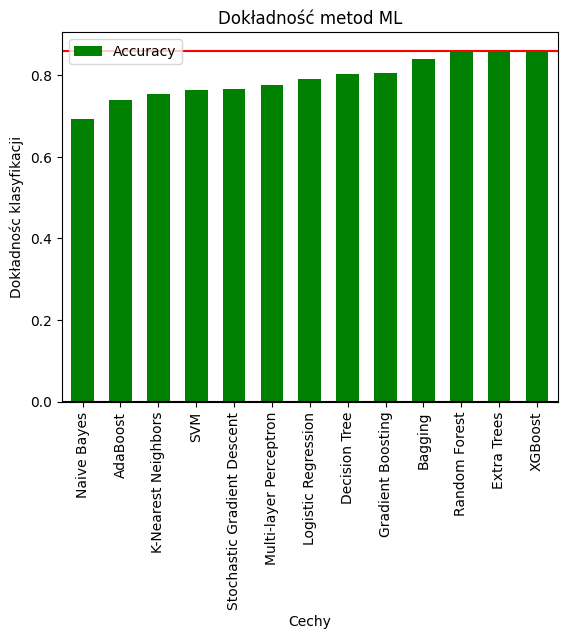

In [ ]:
plt.figure(figsize=(25,10))
ax = training_accuracy.plot(kind='bar', x='Model', y='Accuracy', color='green', width=0.6)
plt.title('Dokładność metod ML')
plt.ylabel('Dokładnośc klasyfikacji')
plt.axhline(y=0.86, color='red', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Cechy')

plt.show()

Wybór modeli o najlepszej dokładności z domyślnymi hiperparametrami

In [ ]:
training_accuracy_best = training_accuracy[training_accuracy['Accuracy'] > 0.85]
training_accuracy_best

,Model,Scaler,Accuracy
2,Random Forest,none,0.860513
9,Extra Trees,none,0.861538
12,XGBoost,none,0.862564


### Próba stworzenia sieci neuronowej o dokładności zbliżonej do wczesniej przetestowanych modeli <br>
- standaryzacja danych za pomocą funkcji **standardscaler**
- konwertowanie danych na dane zapisane w formacie **one-hot encoding**
- utworzenie sieci neuronowej przyjmującej 12 parametrów, a następnie na ich podstawie zwracająca jedną z 3 sklasyfikowanych opcji
- korzystając z funkcji aktywacji **relu** wykorzystywanej dla modeli nieliniowych w celu stworzenia warstwach ukrytych oraz **softmax** zwracającej wynik w postaci jedną z trzech opcji przyznawanej dla jakości wina
- do obliczania błędu używamy funkcji **categorical_crossentropy** używanej dla zadań klasyfikacji


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              13312     
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 16)                4112      
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 279875 (1.07 MB)
Trainable params: 279875 (1.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Dokładność trenowania: 0.996559202671051
Dokładność walidacji: 0.8307692408561707


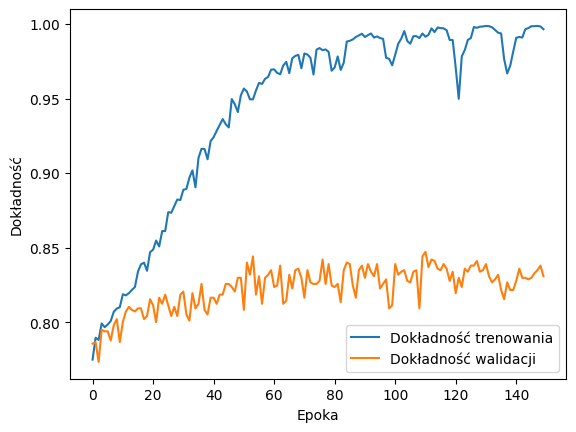

In [ ]:
# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Konwersja do kodowania one-hot
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_valid_cat = tf.keras.utils.to_categorical(y_valid)

# Utworzenie modelu sieci neuronowej
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Input(shape=12))
ann.add(tf.keras.layers.Dense(units=1024, activation="relu"))
ann.add(tf.keras.layers.Dense(units=256, activation="relu"))
ann.add(tf.keras.layers.Dense(units=16, activation="relu"))
ann.add(tf.keras.layers.Dense(units=3, activation="softmax"))  # Dla 7 klas
ann.summary()

# Kompilacja i trenowanie modelu
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = ann.fit(X_train_scaled, y_train_cat, batch_size=64, epochs=150, validation_data=(X_valid_scaled, y_valid_cat), verbose=0)

print('Dokładność trenowania:', history.history['accuracy'][-1])
print('Dokładność walidacji:', history.history['val_accuracy'][-1])

# Wyświetlenie wykresu z modelem
plt.plot(history.history['accuracy'], label='Dokładność trenowania')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()


Ze względu na znacznie niższą dokładność od najlepszych modeli sama sień neuronowa pozostaje głownie ciekawostką 

## 4 Najlepsze modele 
Sensem algorytmów opartych na drzewach jest tworzenie wielu drzew decyzyjnych które dzięki punktowi odniesienia w postaci innych drzew mogą mieć bardzo wysoką dokładność kosztem niższej wydajności. <br>

W teście modeli najwyższą dokładność osiągnęły 3 algorytmy oparte na drzewach losowych:<br>
1 RandomForestClassifier <br>
2 ExtraTreesClassifier<br>
3 XGBClassifier <br>
XGBClassifier w znaczącym stopniu różni się od dwóch pozostałych ponieważ nie tworzy on on zbioru niezależnych drzew, a jedynie używa metody która opiera się na drzewach losowych. XGBClassifier wykorzystuje proces wzmacniania gradientowego w którym drzewa decyzyjne służą do stopniowej poprawy i korekcji modelu
<br><br>

Tworzenie modelu opartego na licznych drzewach prezentuje poniższa grafika. <br>
W związku dodawaniem kolejnych drzew dokładność stworzonego modelu może zyskiwać kolejne procenty zgodności z prawdziwymi danymi. <br> <br>

**RandomForestClassifier** oraz **ExtraTreesClassifier**, wykazują miedzy sobą podobieństwa takie jak głosowanie (_majority voting_), które jest domyślną metodą predykcji drzew generowanych losowo. Wybierana zostaje ta predykcja czyli wartość przypisana dla danej próbki która zbierze największą ilość głosów, zaletą zwiększania ilości estymatorów jest często poprawa dokładności kosztem czasu trenowania oraz zagrożeniem w postaci przeuczenia modelu czyli zbyt dokładnego dopasowania do danych testowych (_overfitting_). Poszczególne drzewa mogą znacząco różnić się bodową, ale jeśli finalnie element spełnia te same kryteria, jest klasyfikowany w ten sam sposób. Innymi słowy kolejność bramek logicznych przez które przejdzie dany element nie ma znaczenia
Posiadają one zasadniczo 2 różnice:

- RandomForestClassifier domyślnie pobiera dane jedynie z podzbioru danych, nastomiast ExtraTreesClassifier tworzy każde drzewo w oparciu na cały zbiór danych <br> <br>

- ExtraTreesClassifier jest znacznie bardziej losowy, RandomForestClassifier domyślnie jako miary do oceny jakości podziału wykorzystuje **indeks Giniego** z możliwością wyboru innego kryterium.<br> 
Następnie na podstawie dobranego kryterium RandomForestClassifier próbuje dobierać tworzyć odpowiednie podziały. Oznacza to, że próbuje wybrać najlepsze wartości progów do podziału na podstawie wybranego kryterium oceny.
ExtraTreesClassifier korzysta z kryteriów w celu oceny, ale progi pomiędzy kolejnymi rozgałęzieniami i tak są losowe

$$1 - \sum_{i=1}^{j} P(i)^2_i$$

**Gini Index** to miara określająca stopień czystości węzła w drzewie decyzyjnym. W praktyce mierzy prawdopodobieństwo błędnej klasyfikacji losowo wybranej próbki. Im niższa wartość indeksu Giniego, tym większa czystość węzła, co wskazuje na mniejsze ryzyko dokonania błędnej klasyfikacji. Dodatkowo, indeks Giniego odzwierciedla stopień losowości w kontekście wyboru optymalnego podziału w drzewie decyzyjnym czyli jednego z głównych czynników wpłuwających na dokładność klasyfikacji
<br> <br>
_P(i)^2_ oznacza w tym wypadku kwadrat odsetek. Polega on na zsumowaniu wartości proporcji podziału. Według tego kryterium idealny podział stanowi stosunek 50/50, czyli 0.5 ponieważ kwadrat dwóch liczb których suma wynosi **1** w typ wypadku jest najmniejsza

**XGBClassifier** w XGBoost, w przeciwieństwie do lasów losowych, kolejność drzew i sposób oraz kolejność w jaki są one budowane, mają znaczenie. Każde kolejne drzewo jest tworzone, aby poprawić błędy wcześniejszych drzew, co prowadzi do postawania skorelowanych drzew. Jest to budowanie w sposób sekwencyjny mający na celu skorygowanie błędów poprzednich modeli. <br>
XGBClassifier nie posiada wyboru kryterium do jakości oceny podziałów ponieważ domyślnie wykorzystuje **Gradient Boosting** - w tym wypadku iteracyjna forma dodawania kolejnych drzew decyzyjnych co skutkuje stopniową poprawą wyniku. Każde następne drzewo ma na celu lekką korektę względem poprzedniego drzewa. Oczywiście tak jak w przypadku pozostałych modeli, zbyt duża ilość drzew może prowadzić do przeuczenia<br>
<br>


Próba dobrania idealnych hierparametrów dla najdokładniejszego modelu <br>
Wykorzystanie funkcji **grid_search** w celu, znalezienia najlepszych hiperparametrów dla modelu **XGBClassifier** który okazał się najdokładniejszy ze wszystkich przetestowanych modeli klasyfikacji

In [ ]:
rf = XGBClassifier()


param_grid = {
    'max_depth': [50, 60, 70, 80, 90, 100, 110, 120],
    'n_estimators': [100, 125, 150, 175, 200, 225, 235, 300],
    'learning_rate': [0.07,0.08,0.09, 0.1, 0.11,0.12, 0.13],
    'random_state': [42],
    'n_jobs': [6]
}


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                        n_jobs = 6, verbose = 2)


grid_search.fit(X_train, y_train)  


best_params = grid_search.best_params_
print("Najlepsze parametry:", best_params)

best_model = grid_search.best_estimator_
best_model

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 300, 'n_jobs': 6, 'random_state': 42}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=6,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
model = best_model
model.fit(X_train, y_train)

predicted = model.predict(X_valid)

accuracy = accuracy_score(y_valid, predicted)
print("Dokładność po dostosowaniu parametrów:", accuracy, '\n')
print('Dokładność pozostałych modeli przed dodoborem parametrów za pomocą metody grid_search ')
print(training_accuracy_best)

Dokładność po dostosowaniu parametrów: 0.8523076923076923 

Dokładność pozostałych modeli przed dodoborem parametrów za pomocą metody grid_search 
            Model Scaler  Accuracy
2   Random Forest   none  0.860513
9     Extra Trees   none  0.861538
12        XGBoost   none  0.862564


Niestety szukanie parametrów metodą **grid_search*** opartej na sprawdzeniu każdej kombinacji wpisanych ustawień nie przyniosło pozytywnych skutków, a finalny wynik **score_accuracy** jest niższy niż ten z domyślnymi parametrami
<br>
Testowanie wpływu narzędzi do normalizacji na poszczególne modele matematyczne w celu sprawdzenia czy możliwa jest za ich pomocą poprawa dokładności klasyfikacji. <br> Użyte funkcje normalizacji:
- StandardScaler,
- MinMaxScaler,
- RobustScaler,
- Normalizer,
- MaxAbsScaler

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, MaxAbsScaler
from sklearn.metrics import accuracy_score
import pandas as pd

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer(),
    "MaxAbsScaler": MaxAbsScaler()
}

results = []  

for model_name, model in models.items():
    best_scaler = 'None'
    best_accuracy = 0
    best_scaler_name = ''
    
    for scaler_name, scaler in scalers.items():
        X_train_sc = scaler.fit_transform(X_train)
        X_valid_sc = scaler.transform(X_valid)
        
        model.fit(X_train_sc, y_train)
        y_pred = model.predict(X_valid_sc)
        accuracy = accuracy_score(y_valid, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_scaler = scaler
            best_scaler_name = scaler_name
    
    results.append({"Model": model_name, "Scaler": best_scaler_name, "Accuracy": best_accuracy})

results_df = pd.DataFrame(results)  
print(results_df)


          Model          Scaler  Accuracy
0  RandomForest  StandardScaler  0.862564
1    ExtraTrees    MaxAbsScaler  0.861538
2       XGBoost  StandardScaler  0.862564


In [ ]:
print('Modele po normalizacji')
print(results)
print('\n \n')
print('Modele bez normalizacji danych')
print(training_accuracy_best)

Modele po normalizacji
[{'Model': 'RandomForest', 'Scaler': 'StandardScaler', 'Accuracy': 0.8625641025641025}, {'Model': 'ExtraTrees', 'Scaler': 'MaxAbsScaler', 'Accuracy': 0.8615384615384616}, {'Model': 'XGBoost', 'Scaler': 'StandardScaler', 'Accuracy': 0.8625641025641025}]

 

Modele bez normalizacji danych
            Model Scaler  Accuracy
2   Random Forest   none  0.860513
9     Extra Trees   none  0.861538
12        XGBoost   none  0.862564


Różnica dla tego zbioru danych wystapiła jedynie dla modelu RandomForestClassifier i wynosi około _0.2%_

Sprawdzenie wpływu ilości estymatorów czyli **n_estimators** na dokładność modelu <br>
Liczba estymatorów to liczba drzew tworzonych przez model, zwiększenie ich ilości może zwiększyć dokładność kosztem czasu trenowania. Zbyt duża ilość estymatorów może prowadzić do przeuczenia modelu dlatego przeprowadzamy test dla każdej ilości drzew z osobna

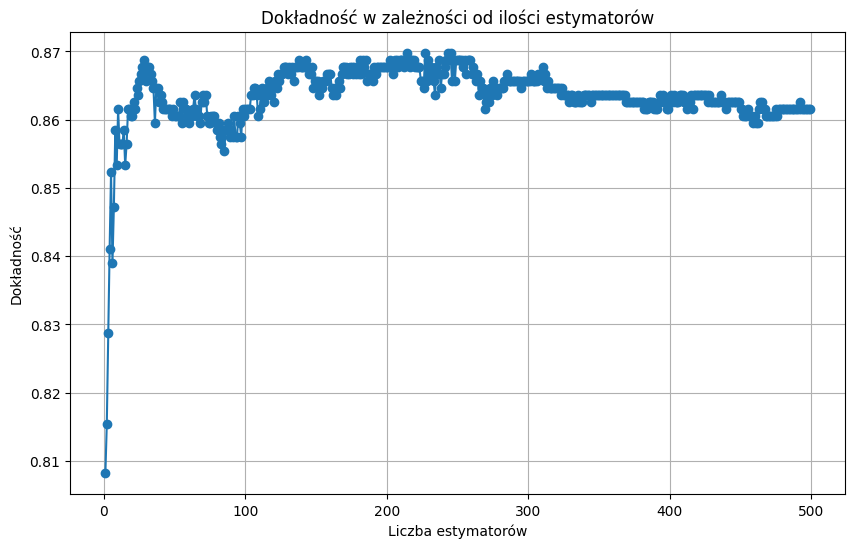

ExtraTreesClassifier
     Accuracy         Model  Index
213  0.869744  MaxAbsScaler    214
226  0.869744  MaxAbsScaler    227
242  0.869744  MaxAbsScaler    243
244  0.869744  MaxAbsScaler    245


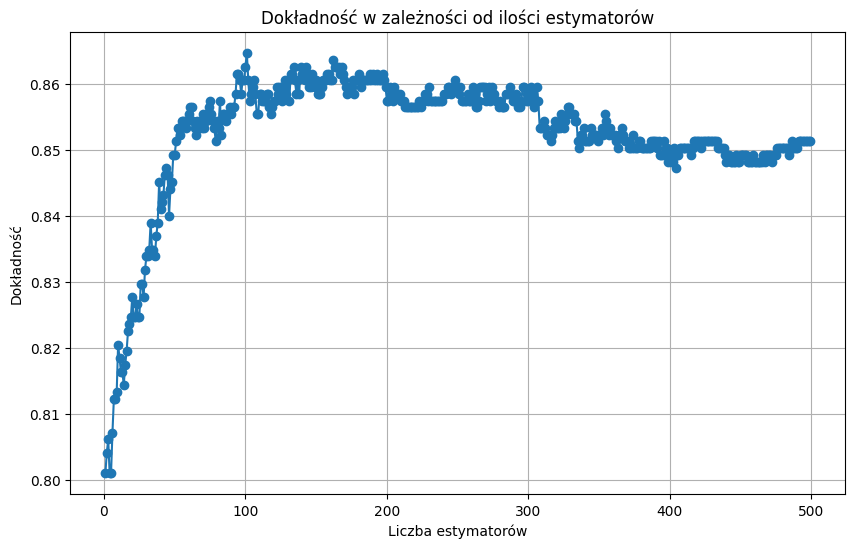

XGBClassifier
     Accuracy             Model  Index
100  0.864615  StandardScaler()    101


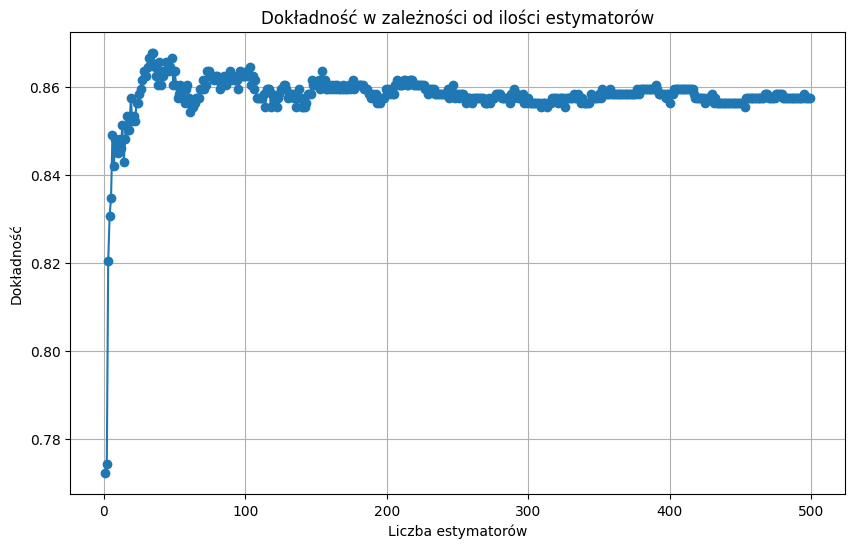

RandomForestClassifier
    Accuracy             Model  Index
33  0.867692  StandardScaler()     34
34  0.867692  StandardScaler()     35


In [ ]:
# testowanie ExtraTreesClassifier
accuracies = []
index = []
model_names = []

extra_trees_row = results_df[results_df["Model"] == "ExtraTrees"]
scaler_for_extra_trees = extra_trees_row["Scaler"].values[0]
scaler_ET = scalers[scaler_for_extra_trees]

X_train_ET = scaler_ET.fit_transform(X_train)
X_valid_ET = scaler_ET.transform(X_valid)

for n_estimators in range(1, 500, 1):
    model = ExtraTreesClassifier(random_state=42, n_jobs=6, n_estimators=n_estimators)
    model.fit(X_train_ET, y_train)
    predicted = model.predict(X_valid_ET)
    accuracy = accuracy_score(y_valid, predicted)
    accuracies.append(accuracy)
    model_names.append(scaler_for_extra_trees)
    index.append(n_estimators)

accuracy_df = pd.DataFrame({"Accuracy": accuracies, "Model": model_names, "Index": index})

plt.figure(figsize=(10, 6))
plt.plot(range(1, 500, 1), accuracies, marker="o")
plt.title("Dokładność w zależności od ilości estymatorów")
plt.xlabel("Liczba estymatorów")
plt.ylabel("Dokładność")
plt.grid(True)
plt.show()

max_accuracy_ET = accuracy_df[accuracy_df["Accuracy"] == accuracy_df["Accuracy"].max()]
print("ExtraTreesClassifier")
print(max_accuracy_ET)



# testowanie XGBClassifier
accuracies = []
index = []
model_names = []

XGB_row = results_df[results_df["Model"] == "XGBoost"]
scaler_XGB = XGB_row["Scaler"].values[0]
scaler_XGB = scalers[scaler_XGB]

X_train_XGB = scaler_XGB.fit_transform(X_train)
X_valid_XGB = scaler_XGB.transform(X_valid)

for n_estimators in range(1, 500, 1):
    model = XGBClassifier(random_state=42, n_jobs=6, n_estimators=n_estimators)
    model.fit(X_train_XGB, y_train)
    predicted = model.predict(X_valid_XGB)
    accuracy = accuracy_score(y_valid, predicted)
    accuracies.append(accuracy)
    model_names.append(scaler_XGB)
    index.append(n_estimators)

accuracy_df = pd.DataFrame({"Accuracy": accuracies, "Model": model_names, "Index": index})

plt.figure(figsize=(10, 6))
plt.plot(range(1, 500, 1), accuracies, marker="o")
plt.title("Dokładność w zależności od ilości estymatorów")
plt.xlabel("Liczba estymatorów")
plt.ylabel("Dokładność")
plt.grid(True)
plt.show()

max_accuracy_XGB = accuracy_df[accuracy_df["Accuracy"] == accuracy_df["Accuracy"].max()]
print("XGBClassifier")
print(max_accuracy_XGB)


# testowanie RandomForestClassifier
accuracies = []
index = []
model_names = []

RF_row = results_df[results_df["Model"] == "RandomForest"]
scaler_RF = RF_row["Scaler"].values[0]
scaler_RF = scalers[scaler_RF]

X_train_RF = scaler_RF.fit_transform(X_train)
X_valid_RF = scaler_RF.transform(X_valid)

for n_estimators in range(1, 500, 1):
    model = RandomForestClassifier(random_state=42, n_jobs=6, n_estimators=n_estimators)
    model.fit(X_train_RF, y_train)
    predicted = model.predict(X_valid_RF)
    accuracy = accuracy_score(y_valid, predicted)
    accuracies.append(accuracy)
    model_names.append(scaler_RF)
    index.append(n_estimators)

accuracy_df = pd.DataFrame({"Accuracy": accuracies, "Model": model_names, "Index": index})

plt.figure(figsize=(10, 6))
plt.plot(range(1, 500, 1), accuracies, marker="o")
plt.title("Dokładność w zależności od ilości estymatorów")
plt.xlabel("Liczba estymatorów")
plt.ylabel("Dokładność")
plt.grid(True)
plt.show()

max_accuracy_RF = accuracy_df[accuracy_df["Accuracy"] == accuracy_df["Accuracy"].max()]
print("RandomForestClassifier")
print(max_accuracy_RF)

Efektem końcowym jest wybranie metody ExtraTreesClassifier której dokładność jest najwyższa

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

model = ExtraTreesClassifier(n_estimators=243, random_state=42, n_jobs=6)
model.fit(X_train, y_train)

predicted = model.predict(X_valid)

accuracy = accuracy_score(y_valid, predicted)
print("Dokładność po dostosowaniu parametrów:", accuracy, '\n')
print('Dokładność najlepszych modeli z domyślymi parametrami \n')
print(training_accuracy_best)

Dokładność po dostosowaniu parametrów: 0.8707692307692307 

Dokładność najlepszych modeli z domyślymi parametrami 

            Model Scaler  Accuracy
2   Random Forest   none  0.860513
9     Extra Trees   none  0.861538
12        XGBoost   none  0.862564


Zapisanie modelu do pliku

In [ ]:
dump(model, 'Wine_Predict.joblib')

['Wine_Predict.joblib']

## 5 Przykład zastosowania modelu

Przekazywanie danych dotyczących wina w celu określenia jego jakości <br>
<img src="Images/Predictor1.png" alt="Tekst zastępczy" width="800" > <br>
*Przekazywanie danych*
<br><br>

<img src="Images/Predictor2.png" alt="Tekst zastępczy" width="800" > <br>
*Przekazywanie danych*
<br><br>

Odpowiedź ze strony modelu w postaci liczby 0,1 lub 2 oznaczajęcej zgodnie z tabelą niską, przeciętną lub wysoką jakość wina <br>
Prezentacja w tabeli oraz na wykresie jak podane wino prezentuje się na tle kilku tysięcy innyc win <br>
<img src="Images/Predictor3.png" alt="Tekst zastępczy" width="800" > <br>
*Prezentacja jakości wina na tle innych win*
<br><br>

Wizualizacja jak dany parametr prezentuje się na tle innych win na dystrybuancie. <br>
Na wykresie kolorem zielonym zaznaczony jest również przedział w którym znajdują się parametry wina wzorcowego<br>
<img src="Images/Predictor4.png" alt="Tekst zastępczy" width="800" > <br>
*Porównanie wprowadzonego parametru na tle innych win i win wzorcowych*
<br><br>

<img src="Images/Predictor5.png" alt="Tekst zastępczy" width="800" > <br>
*Podanie parametru będącego w tym samym przedziale co parametr wzorcowy*

## 6 Źródła
http://marek.piasecki.staff.iiar.pwr.wroc.pl/dydaktyka/isa/2007/Przywara_Damian.pdf <br><br>
https://gdudek.el.pcz.pl/images/Dydaktyka/Wyklad3_UM_DDkl.pdf<br><br>
https://mlu-explain.github.io/random-forest/<br><br>
https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/<br><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br><br>
https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6<br><br>
https://medium.com/aiguys/xgboost-2-0-major-update-on-tree-based-methods-2e4bc4f15baf<br><br>
https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c<br><br>
